### Implmentation of LeNet-5:

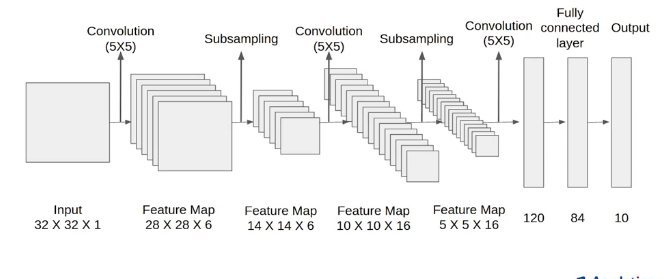

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
tf.__version__

'2.9.2'

In [3]:
(train_x,train_y),(valid_x,valid_y) = keras.datasets.mnist.load_data()

In [4]:
train_x = np.expand_dims(train_x,axis=-1)

In [5]:
train_x.shape,train_y.shape

((60000, 28, 28, 1), (60000,))

In [6]:
valid_x = np.expand_dims(valid_x,axis=-1)

In [7]:
valid_x.shape,valid_y.shape

((10000, 28, 28, 1), (10000,))

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x,train_y))

In [9]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

In [10]:
NUM_CLASS = 10

In [11]:
def one_hot(x,y):
  y_one_hot = tf.one_hot(y,depth=NUM_CLASS)  
  return x,y_one_hot

In [12]:
train_ds = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).map(one_hot)

In [13]:
valid_ds = tf.data.Dataset.from_tensor_slices((valid_x,valid_y))

In [14]:
valid_ds = valid_ds.batch(BATCH_SIZE).map(one_hot)

In [15]:
model = Sequential([
    layers.Rescaling(scale=1./255,input_shape=(28,28,1)),

    layers.Conv2D(filters=6,kernel_size=5,strides=1,activation="relu"),
    layers.AveragePooling2D(pool_size=2,strides=2),
 
    layers.Conv2D(filters=16,kernel_size=5,strides=1,activation="relu"),
    layers.AveragePooling2D(pool_size=2,strides=2),
    
    layers.Flatten(),

    layers.Dense(120,activation="relu"),
    layers.Dense(84,activation="relu"),
    layers.Dense(10,activation="softmax")

])

In [16]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [17]:
# from_logits=True, when we directly feed model output to the loss function
# by default, it assumes y_pred values will be in range [0,1], that means softmax or sigmoid activation used in model itself
loss = tf.keras.losses.CategoricalCrossentropy()

In [18]:
recall = keras.metrics.Recall()
precision = keras.metrics.Precision()

In [33]:
def metrics_calc(y_true,y_pred):
  pred = softmax(y_pred)
  yhat = tf.argmax(pred,axis=-1)
  recall.update_state(y_true,y_pred)
  precision.update_state(y_true,y_pred)

In [19]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy',precision,recall])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0

In [21]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/3
938/938 [==============================] - 9s 6ms/step - loss: 0.3415 - accuracy: 0.8979 - precision: 0.9344 - recall: 0.8618 - val_loss: 0.1566 - val_accuracy: 0.9530 - val_precision: 0.9590 - val_recall: 0.9472
Epoch 2/3
938/938 [==============================] - 5s 5ms/step - loss: 0.1162 - accuracy: 0.9651 - precision: 0.9703 - recall: 0.9600 - val_loss: 0.1128 - val_accuracy: 0.9661 - val_precision: 0.9700 - val_recall: 0.9631
Epoch 3/3
938/938 [==============================] - 5s 5ms/step - loss: 0.0781 - accuracy: 0.9765 - precision: 0.9799 - recall: 0.9738 - val_loss: 0.0678 - val_accuracy: 0.9788 - val_precision: 0.9820 - val_recall: 0.9768


In [22]:
history.history

{'loss': [0.34148257970809937, 0.1161637008190155, 0.07812810689210892],
 'accuracy': [0.8979166746139526, 0.9651166796684265, 0.9764833450317383],
 'precision': [0.9344223737716675, 0.9703177213668823, 0.9798916578292847],
 'recall': [0.8618333339691162, 0.9599999785423279, 0.973800003528595],
 'val_loss': [0.1565738171339035, 0.11277785897254944, 0.06776438653469086],
 'val_accuracy': [0.953000009059906, 0.9660999774932861, 0.9787999987602234],
 'val_precision': [0.9589956402778625, 0.9699869155883789, 0.9820046424865723],
 'val_recall': [0.9472000002861023, 0.963100016117096, 0.9768000245094299]}

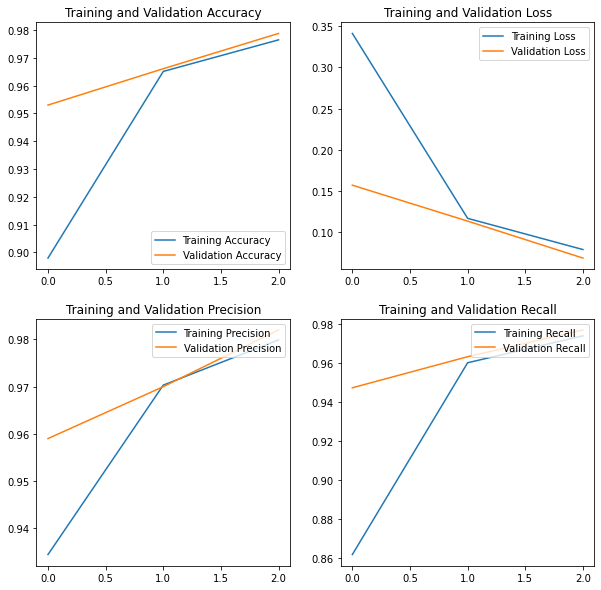

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

pr = history.history['precision']
val_pr = history.history['val_precision']

rec = history.history['recall']
val_rec = history.history['val_recall']


epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(2, 2, 3)
plt.plot(epochs_range, pr, label='Training Precision')
plt.plot(epochs_range, val_pr, label='Validation Precision')
plt.legend(loc='lower right')
plt.title('Training and Validation Precision')

plt.subplot(2, 2, 4)
plt.plot(epochs_range, rec, label='Training Recall')
plt.plot(epochs_range, val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')
plt.show()

In [52]:
out = model.predict(valid_ds)

157/157 [==============================] - 0s 2ms/step


In [53]:
out.shape

(10000, 10)

In [54]:
out

array([[8.0568690e-15, 3.4191344e-11, 5.0137744e-10, ..., 1.0000000e+00,
        1.7466685e-12, 2.0915596e-10],
       [5.0360497e-13, 7.6551549e-19, 1.0000000e+00, ..., 9.7820998e-18,
        8.5668196e-21, 3.0780814e-21],
       [9.8102871e-12, 9.9999988e-01, 2.5760546e-10, ..., 9.5527664e-10,
        3.1474926e-08, 6.0011987e-12],
       ...,
       [2.3266709e-19, 4.3011336e-13, 2.1000436e-16, ..., 2.4884221e-13,
        3.6866635e-15, 6.5177634e-14],
       [2.3681376e-20, 1.5873054e-19, 4.0753008e-24, ..., 2.4464745e-18,
        2.6642612e-08, 1.3546492e-16],
       [9.9665209e-13, 3.8806132e-19, 9.4129944e-17, ..., 7.9850789e-17,
        7.9419232e-14, 1.6721472e-19]], dtype=float32)

In [55]:
yhat = tf.argmax(out,axis=-1).numpy()

In [56]:
yhat

array([7, 2, 1, ..., 4, 5, 6])

In [62]:
y = np.concatenate([y1 for x,y1 in valid_ds])

In [63]:
y.shape

(10000, 10)

In [59]:
y = y.argmax(-1)

In [60]:
s=0
for i in range(10):
  tp,fp,fn = 0,0,0
  for a,p in zip(y,yhat):
    if a==i and p==i:
      tp+=1
    elif a==i and p!=i:
      fn+=1
    elif a!=i and p==i:
      fp+=1
  pr = tp/(tp+fp)
  rec = tp/(tp+fn)
  s+=pr
  print(i,"Pr=",pr,"rec=",rec)

0 Pr= 0.9878665318503539 rec= 0.996938775510204
1 Pr= 0.9929824561403509 rec= 0.9973568281938326
2 Pr= 0.98747591522158 rec= 0.9932170542635659
3 Pr= 0.9959839357429718 rec= 0.9821782178217822
4 Pr= 0.9938650306748467 rec= 0.9898167006109979
5 Pr= 0.9844444444444445 rec= 0.9932735426008968
6 Pr= 0.9968387776606955 rec= 0.9874739039665971
7 Pr= 0.9921568627450981 rec= 0.9844357976653697
8 Pr= 0.984646878198567 rec= 0.9876796714579056
9 Pr= 0.9822309970384995 rec= 0.9861248761149654


In [61]:
s/10

0.9898491829717407

In [67]:
prc = keras.metrics.Precision(class_id=3)

In [68]:
prc.update_state(y,out)

In [70]:
prc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.99598396>

In [66]:
prc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.989998>

In [18]:
a = np.array([[0.4,-0.8,9.4]])

In [19]:
a

array([[ 0.4, -0.8,  9.4]])

In [24]:
b = np.array([[0,1,0]])
b

array([[0, 1, 0]])

In [27]:
lf = keras.losses.CategoricalCrossentropy(from_logits=True)

In [28]:
lf(b,a)

<tf.Tensor: shape=(), dtype=float64, numpy=10.200160567231164>

In [29]:
lf1 = keras.losses.CategoricalCrossentropy()

In [30]:
lf1(b,softmax(a))

<tf.Tensor: shape=(), dtype=float32, numpy=10.20016>